# Plot HaCaT survival after infection

In [1]:
library(tidyverse)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
# Load data
hacat_data <- read_tsv("hacat_saureus_040825.tsv")

# Convert coded columns into factors for readability
hacat_data <- hacat_data %>%
  mutate(
    Bacteria = factor(bact_cond, levels = c(1, 0), labels = c("Live", "Dead")),
    Cell = factor(cell_cond, levels = c(1, 0), labels = c("Live", "Dead")),
    bact_OD = factor(bact_OD)
  )
head(hacat_data)

Rows: 48 Columns: 5
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (5): Timepoint, bact_OD, bact_cond, cell_cond, cell_count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Timepoint,bact_OD,bact_cond,cell_cond,cell_count,Bacteria,Cell
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
0,0.5,1,1,355000,Live,Live
0,0.5,1,0,5000,Live,Dead
0,0.5,0,1,185000,Dead,Live
0,0.5,0,0,0,Dead,Dead
0,0.25,1,1,57500,Live,Live
0,0.25,1,0,7500,Live,Dead


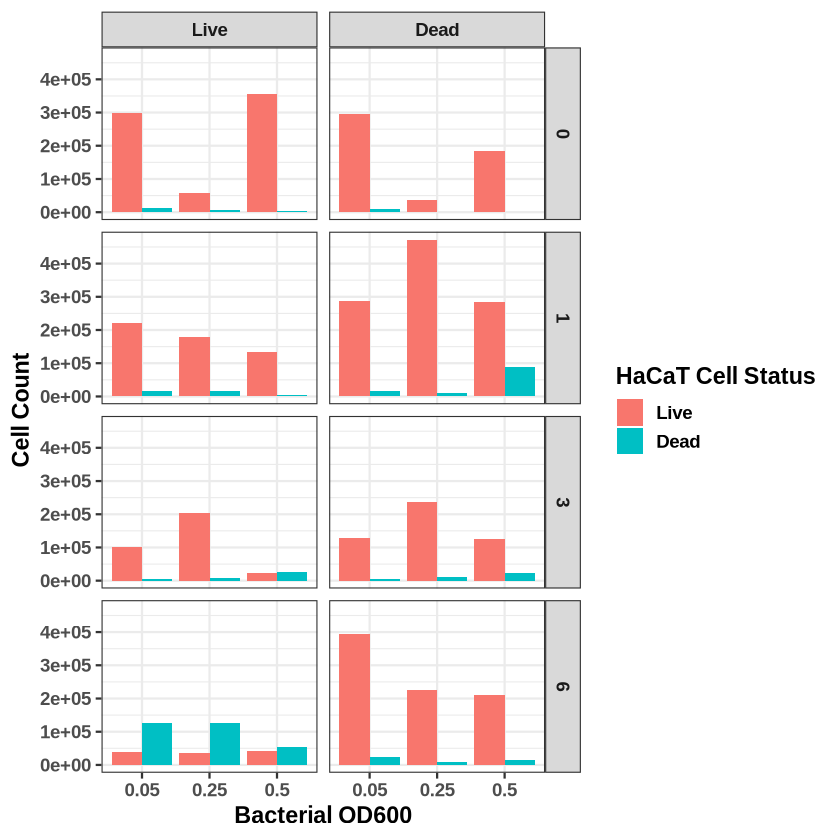

In [9]:
hacat_bar_death <- ggplot(hacat_data, aes(x = bact_OD, y = cell_count, fill = Cell)) +
  geom_bar(stat = "identity", position = "dodge") +
  facet_grid(Timepoint ~ Bacteria) +
  labs(
    x = "Bacterial OD600",
    y = "Cell Count",
    fill = "HaCaT Cell Status"
  ) +
  theme_bw(base_size = 14) +
  theme(
    axis.title = element_text(face = "bold"),
    axis.text = element_text(face = "bold"),
    strip.text = element_text(face = "bold"),
    legend.title = element_text(face = "bold"),
    legend.text = element_text(face = "bold")
  )

hacat_bar_death

ggsave("hacat_bar_death_040825.png", plot = hacat_bar_death, width = 8, height = 12)